## Observations and Insights 

There are several observations that can be made from the data as analyzed:

1)Of the four treatments deemed promising ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin') Capomulin and Ramicane had lower final tumor volumes. 

2)Examining the average tumor volume versus mouse weight showed a positive correlation (r = 0.84).  Therefore, analyzing the mouse weight for different treatments would be important to make certain no bias is introduced based solely on weight.

3)The number of male and female mice in the study were close to equal (F49 and M51%)

4)From the box and whisker plot and outlier analysis for final tumor volume of the four promising regimes ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin') one outlier exists.  This was from the Infubinol trial.  The mouse ID is C326 and it's weight was below the lower limit.  

5)Additional work: Analysis of the average weight for mice in the treatment groups shows the mice in the Capomulin and Ramicane groups have lower weights on average.  Therefore, some bias may be possible in the data for tumor volume since it is shown that mouse weight correlates to tumor volume.  This was not a requirement of the work but based on observation (2) I thought it would be good to look at this data and comment.


**Reading in Initial Data and merging into dataframe**

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results.head()

# Combine the data into a single dataset

combined_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
rows_initial = combined_study["Mouse ID"].count()

In [32]:
print("Looking at Table of Merged Data")
#combined_study

Looking at Table of Merged Data


In [33]:
# Checking the number of mice.
Mouse_ID_List = combined_study["Mouse ID"].unique()
Num_Mice_before = len(Mouse_ID_List)


In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#sorting data by MouseID then timepoint so have time ordered for each mouse - making sure no issues in data recording
combined_study.sort_values(["Mouse ID", "Timepoint"], inplace = True)

#problem_id used to track which id has problems
problem_id = []

#below loops through all data in combined study and checks if consecutive TimeStamps for same mouse are equal
for i in range (0,(len(combined_study)-1)):
        Mouse_ID_1 = combined_study.iloc[i,0]
        Mouse_ID_2 = combined_study.iloc[i+1,0]
        if Mouse_ID_1 == Mouse_ID_2:
            if combined_study.iloc[i,5] == combined_study.iloc[i+1,5]:
                problem_id.append(Mouse_ID_1) #if have cuplicate then record mouse ID
                
#an individual mouse may have several duplicate entries therefore necessary to remove duplicates from problem_id list.
problem_mouse = list(set(problem_id)) #set removes duplicate values from list and list converts set to a list.


In [35]:

#below removes the problem mice from the combined study
for x in problem_mouse:
    combined_study = combined_study[combined_study["Mouse ID"]!= x]

#Finding number of mice and data entries after filtering
Num_Mice_after = len(combined_study["Mouse ID"].unique())
rows_after = combined_study["Mouse ID"].count()

#Printing data to see change in DataFrame
print("")
print("#######################################################")
print("Results of Identifying Mouse with Duplicat TimePoints")
print("")
print(f"Identified Mice with Duplicate Timepoints")
print(f"Number of Mice ID'd: {len(problem_mouse)}")
print(f"ID's of Mice: {problem_mouse}")
print("")
print(f"Initial record length {rows_initial}")
print(f"Filtered record length {rows_after}")
print(f"Removed {rows_initial-rows_after} rows from data set")
print ("")
print(f"Initial number of mice {Num_Mice_before} ") 
print(f"after filtering new number is {Num_Mice_after}")




#######################################################
Results of Identifying Mouse with Duplicat TimePoints

Identified Mice with Duplicate Timepoints
Number of Mice ID'd: 1
ID's of Mice: ['g989']

Initial record length 1893
Filtered record length 1880
Removed 13 rows from data set

Initial number of mice 249 
after filtering new number is 248


## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Isolate the Regimens used in the study
regimen_list = combined_study["Drug Regimen"].unique()

#Perform groupby on the Regimen
study_groupby = combined_study.groupby("Drug Regimen")

#Calculate statistics of the study for different Regimens
mean_grouped = study_groupby["Tumor Volume (mm3)"].mean()
median_grouped = study_groupby["Tumor Volume (mm3)"].median()
var_grouped = study_groupby["Tumor Volume (mm3)"].var()
std_grouped = study_groupby["Tumor Volume (mm3)"].std()
SEM_grouped = study_groupby["Tumor Volume (mm3)"].sem()
Count_grouped = study_groupby["Tumor Volume (mm3)"].count()

Summary_df= pd.DataFrame(round(mean_grouped,2))
Summary_df = Summary_df.rename(columns = {"Tumor Volume (mm3)":"Mean"})
Summary_df["Median"]=round(median_grouped,2)
Summary_df["Variance"]=round(var_grouped,2)
Summary_df["STDev"]=round(std_grouped,2)
Summary_df["SEM"]=round(SEM_grouped,2)
Summary_df["Data Count"]=round(Count_grouped,2)
print("")
print("######################################################################")
print( "Statistical Analysis of Tumor Volume (mm3) - Summary of Study Data")

Summary_df



######################################################################
Statistical Analysis of Tumor Volume (mm3) - Summary of Study Data


,Mean,Median,Variance,STDev,SEM,Data Count
Drug Regimen,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,230
Ceftamin,52.59,51.78,39.29,6.27,0.47,178
Infubinol,52.88,51.82,43.13,6.57,0.49,178
Ketapril,55.24,53.70,68.55,8.28,0.60,188
Naftisol,54.33,52.51,66.17,8.13,0.60,186
Placebo,54.03,52.29,61.17,7.82,0.58,181
Propriva,52.32,50.45,43.85,6.62,0.54,148
Ramicane,40.22,40.67,23.49,4.85,0.32,228
Stelasyn,54.23,52.43,59.45,7.71,0.57,181


## Bar and Pie Charts

In [38]:
#regimen_list
num_points = pd.DataFrame()
num_points = Summary_df["Data Count"]
num_points = num_points.sort_values(ascending = True)



Total Amount of Data in Study: 1880



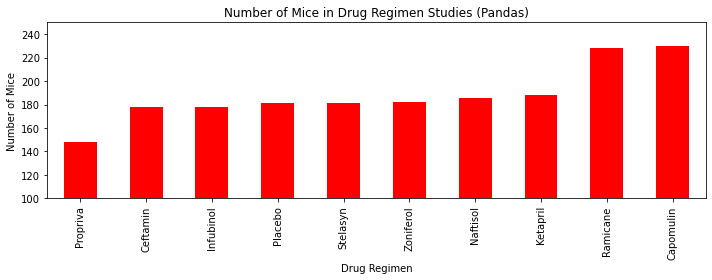

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
x_axis = num_points.index  
y_axis = num_points
#num_points_mod = num_points.set_index("Treatment")
Total_Points = num_points.sum()

print("")
print(f"Total Amount of Data in Study: {Total_Points}")
print("")

# Use DataFrame.plot() in order to create a bar chart of the data
num_points.plot(kind="bar", color = "r", figsize=(10,4), title = "Number of Mice in Drug Regimen Studies (Pandas)")
# Set additional parameters for the chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(100,250)

plt.tight_layout()
plt.show()


Total Number of Points in Study: 1880



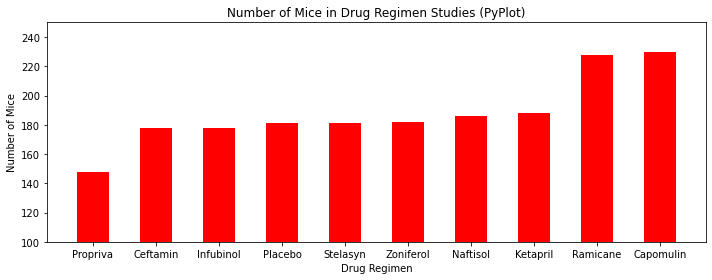

In [40]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using Pyplot
print("")
print(f"Total Number of Points in Study: {Total_Points}")
print("")

plt.figure(figsize=(10,4)) #10 inches wide by 4" tall

plt.bar(x_axis, y_axis, color='r', width = 0.5, alpha=1, align="center") #alpha is how transparent bars are
plt.ylim(100, 250)

plt.title("Number of Mice in Drug Regimen Studies (PyPlot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout() #tight layout helps to arrange the graph to look nicer

plt.show()


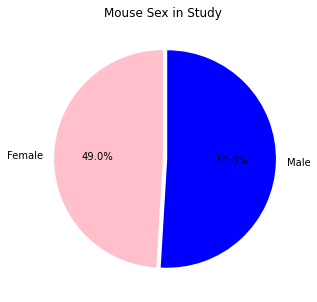

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Mouse_sex_group = combined_study.groupby("Sex")
Mouse_sex_df = Mouse_sex_group["Sex"].count()
Mouse_sex_df
colors = ["Pink", "Blue"]
explode = [0,0.04]

plot = Mouse_sex_df.plot.pie( figsize=(5, 5), startangle = 90, autopct = "%1.1f%%", colors = colors, 
                     explode = explode, title = "Mouse Sex in Study" )
plt.ylabel('')
plt.show()

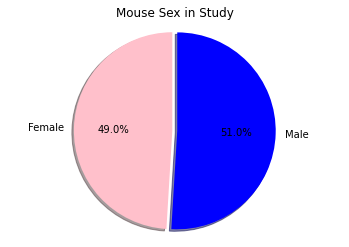

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


Label = Mouse_sex_df.index

data = Mouse_sex_df.iloc[:]
data

colors = ["Pink", "Blue"]

explode = (0, 0.05)

plt.title("Mouse Sex in Study")
plt.pie(data, explode=explode, labels=Label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#create list of the highlighted promising treatments
promising_treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#create dataframe for new promising treatment data
promising_treatment_df = pd.DataFrame()

#iterate through combined_study data to isolate only promising treatment data
for x in promising_treatment_list:
    promising_treatment_df = promising_treatment_df.append(combined_study[combined_study["Drug Regimen"] == x])

#iterate through dataframe for promising treatments to isolate the final tumor volume.  Occurs when mouse ID changes.    
final_tumor_volumes_df = pd.DataFrame()

for x in range(1, (len(promising_treatment_df)-1)):
            mouse_ID1 = promising_treatment_df.iloc[x][0]
            mouse_ID2 = promising_treatment_df.iloc[x+1][0]
            if mouse_ID1 != mouse_ID2:
                selected_data = promising_treatment_df.iloc[x][:]
                final_tumor_volumes_df = final_tumor_volumes_df.append(selected_data)

final_tumor_volumes_df = final_tumor_volumes_df.rename(columns = {"Tumor Volume (mm3)": "Final Tumor Volume"})
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volumes_df.index.name = "Index"


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatment_list

# Create empty list to fill with tumor vol data (for plotting

final_tumor_vol0 = final_tumor_volumes_df[final_tumor_volumes_df["Drug Regimen"]==promising_treatment_list[0]]["Final Tumor Volume"]
final_tumor_vol1 = final_tumor_volumes_df[final_tumor_volumes_df["Drug Regimen"]==promising_treatment_list[1]]["Final Tumor Volume"]
final_tumor_vol2 = final_tumor_volumes_df[final_tumor_volumes_df["Drug Regimen"]==promising_treatment_list[2]]["Final Tumor Volume"]
final_tumor_vol3 = final_tumor_volumes_df[final_tumor_volumes_df["Drug Regimen"]==promising_treatment_list[3]]["Final Tumor Volume"]

final_tumor_vol0.reset_index(inplace = True, drop = True)
final_tumor_vol1.reset_index(inplace = True, drop = True)
final_tumor_vol2.reset_index(inplace = True, drop = True)
final_tumor_vol3.reset_index(inplace = True, drop = True)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

final_tumor_data = pd.DataFrame()
final_tumor_data[promising_treatment_list[0]]=final_tumor_vol0
final_tumor_data[promising_treatment_list[1]]=final_tumor_vol1
final_tumor_data[promising_treatment_list[2]]=final_tumor_vol2
final_tumor_data[promising_treatment_list[3]]=final_tumor_vol3

quartiles_df = pd.DataFrame()

quartiles_df[promising_treatment_list[0]] = final_tumor_data[promising_treatment_list[0]].quantile([0.25,0.5,0.75])
quartiles_df[promising_treatment_list[1]] = final_tumor_data[promising_treatment_list[1]].quantile([0.25,0.5,0.75])
quartiles_df[promising_treatment_list[2]] = final_tumor_data[promising_treatment_list[2]].quantile([0.25,0.5,0.75])
quartiles_df[promising_treatment_list[3]] = final_tumor_data[promising_treatment_list[3]].quantile([0.25,0.5,0.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)

#determining iqr's and adding to dataframe
iqr_0 = quartiles_df.iloc[2][0]-quartiles_df.iloc[0][0]
iqr_1 = quartiles_df.iloc[2][1]-quartiles_df.iloc[0][1]
iqr_2 = quartiles_df.iloc[2][2]-quartiles_df.iloc[0][2]
iqr_3 = quartiles_df.iloc[2][3]-quartiles_df.iloc[0][3]
iqr_row = pd.Series(data = {promising_treatment_list[0]: iqr_0, promising_treatment_list[1]:iqr_1, 
                           promising_treatment_list[2]: iqr_2, promising_treatment_list[3]: iqr_3}, name = "IQR")
quartiles_df = quartiles_df.append(iqr_row, ignore_index=False)

#determining lower bounds and adding to dataframe
lower_bound_0 = quartiles_df.iloc[0][0]-1.5*quartiles_df.iloc[3][0]
lower_bound_1 = quartiles_df.iloc[0][1]-1.5*quartiles_df.iloc[3][1]
lower_bound_2 = quartiles_df.iloc[0][2]-1.5*quartiles_df.iloc[3][2]
lower_bound_3 = quartiles_df.iloc[0][3]-1.5*quartiles_df.iloc[3][3]
lower_bound_row = pd.Series(data = {promising_treatment_list[0]: lower_bound_0, promising_treatment_list[1]:lower_bound_1, 
                           promising_treatment_list[2]: lower_bound_2, promising_treatment_list[3]: lower_bound_3}, 
                            name = "lower bound")
quartiles_df = quartiles_df.append(lower_bound_row, ignore_index=False)

#determining upper bounds and adding to dataframe
upper_bound_0 = quartiles_df.iloc[2][0]+1.5*quartiles_df.iloc[3][0]
upper_bound_1 = quartiles_df.iloc[2][1]+1.5*quartiles_df.iloc[3][1]
upper_bound_2 = quartiles_df.iloc[2][2]+1.5*quartiles_df.iloc[3][2]
upper_bound_3 = quartiles_df.iloc[2][3]+1.5*quartiles_df.iloc[3][3]
upper_bound_row = pd.Series(data = {promising_treatment_list[0]: upper_bound_0, promising_treatment_list[1]:upper_bound_1, 
                           promising_treatment_list[2]: upper_bound_2, promising_treatment_list[3]: upper_bound_3}, 
                            name = "upper bound")
quartiles_df = quartiles_df.append(upper_bound_row, ignore_index=False)

print("")
print("####################################################################################")
print("Summary Table of Quartiles, IQR, Lower and Upper Bounds for Final Tumor Volume (mm3)")
print(f"For Promising Treatments: {promising_treatment_list}")
print("")
quartiles_df.index.name = "Parameter"
quartiles_df





####################################################################################
Summary Table of Quartiles, IQR, Lower and Upper Bounds for Final Tumor Volume (mm3)
For Promising Treatments: ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



,Capomulin,Ramicane,Infubinol,Ceftamin
Parameter,,,,
0.25,32.377357,31.560470,54.048608,48.487729
0.5,38.125164,36.561652,60.165180,59.796928
0.75,40.159220,40.659006,65.525743,64.219213
IQR,7.781863,9.098537,11.477135,15.731485
lower bound,20.704562,17.912664,36.832905,24.890502
upper bound,51.832015,54.306811,82.741446,87.816440


In [45]:
#searching for outliers in data sets

final_tumor_volumes_df
Outlier_df = pd.DataFrame()
Outlier_type = []

#Upper Bound Outlier
for i in range(0,len(final_tumor_volumes_df)):   
    for x in range(0,len(promising_treatment_list)):
        if final_tumor_volumes_df.iloc[i][1] == promising_treatment_list[x]:
            if final_tumor_volumes_df.iloc[i,6] > quartiles_df.iloc[5][x]:
                Outlier_df = Outlier_df.append(final_tumor_volumes_df.iloc[i][:])
                Outlier_type.append("Above UL")

for i in range(0,len(final_tumor_volumes_df)):   
    for x in range(0,len(promising_treatment_list)):
        if final_tumor_volumes_df.iloc[i][1] == promising_treatment_list[x]:
            if final_tumor_volumes_df.iloc[i,6] < quartiles_df.iloc[4][x]:
                Outlier_df = Outlier_df.append(final_tumor_volumes_df.iloc[i][:])
                Outlier_type.append("Below LL")

Outlier_df["Outlier Type"] = Outlier_type
print("")
print("#######################################################################################")
print("From Quartile calculations and Upper/Lower Bounds Following Mice are Potential Outliers")

Outlier_df.index.name = "Index"
Outlier_df


#######################################################################################
From Quartile calculations and Upper/Lower Bounds Following Mice are Potential Outliers


,Age_months,Drug Regimen,Final Tumor Volume,Metastatic Sites,Mouse ID,Sex,Timepoint,Weight (g),Outlier Type
Index,,,,,,,,,
669,18.0,Infubinol,36.321346,0.0,c326,Female,5.0,25.0,Below LL


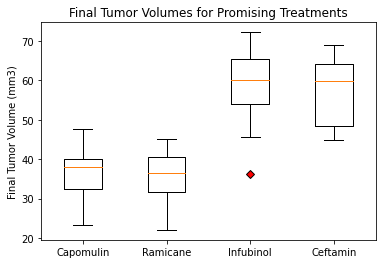

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_diamond = dict(markerfacecolor='r', marker='D')
#ax3.boxplot(data, flierprops=green_diamond)

labels = promising_treatment_list
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Promising Treatments')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([final_tumor_vol0, final_tumor_vol1, final_tumor_vol2, final_tumor_vol3], showfliers = True,
           flierprops = red_diamond, labels=labels)
plt.show()



## Line and Scatter Plots

In [47]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Allow user to choose mouse based on list of possible mice.  Include handling to make certain mouse is in list

#showing all the mice on Capomulin
List_Mouse_Capomulin = combined_study["Mouse ID"][combined_study["Drug Regimen"]=="Capomulin"].unique()
print("")
print("List of mice in Capomulin Study")
print(List_Mouse_Capomulin)

print("")
chosen_mouse = ""
while chosen_mouse not in List_Mouse_Capomulin:
    chosen_mouse = input("What mouse do you choose?")
    if chosen_mouse not in List_Mouse_Capomulin:
        print(f"Mouse {chosen_mouse} is not in the Capomulin Study.  Choose again.")



List of mice in Capomulin Study
['b128' 'b742' 'f966' 'g288' 'g316' 'i557' 'i738' 'j119' 'j246' 'l509'
 'l897' 'm601' 'm957' 'r157' 'r554' 'r944' 's185' 's710' 't565' 'u364'
 'v923' 'w150' 'w914' 'x401' 'y793']

What mouse do you choose?s185


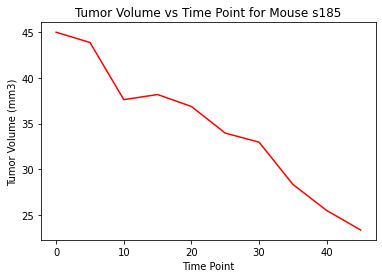

In [48]:
#isolating data based on chosen mouse
mouse_data_x = combined_study[combined_study["Mouse ID"]==chosen_mouse]["Timepoint"]
mouse_data_y = combined_study[combined_study["Mouse ID"]==chosen_mouse]["Tumor Volume (mm3)"]

#plotting data for mouse
plt.plot(mouse_data_x[:], mouse_data_y[:], color = "r")

plt.title(f"Tumor Volume vs Time Point for Mouse {chosen_mouse}")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

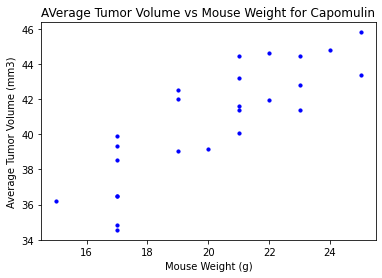

Number of points in average tumor volume: 25
Number of points in mouse weight 25


In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


#Isolate only Capomulin Drug Regimen

#set drug regimen
Drug_Regimen = "Capomulin"
Mouse_Drug_Refined = combined_study[combined_study["Drug Regimen"]==Drug_Regimen]

#On isolated data set perform groupby on Mouse ID
Mouse_ID_Groupby = Mouse_Drug_Refined.groupby("Mouse ID")

#get list of average tumor volume from groupby object
Avg_TVolume = Mouse_ID_Groupby["Tumor Volume (mm3)"].mean()
#get list of mouse weight from groupby object
Mouse_Weight = Mouse_ID_Groupby["Weight (g)"].unique()

#Mouse weight is a string - convert to float point
Mouse_Weight = Mouse_Weight.astype(float)

#scatter plot
plt.scatter(Mouse_Weight[:], Avg_TVolume[:], color="blue", s = 10)
plt.title("AVerage Tumor Volume vs Mouse Weight for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

#print number of points in avg tumor volume and weight fields
print(f"Number of points in average tumor volume: {len(Avg_TVolume)}")
print(f"Number of points in mouse weight {len(Mouse_Weight)}")

## Correlation and Regression

The correlation between Mouse Weight and Avg Tumor Volume is 0.8419 for mice on Capomulin


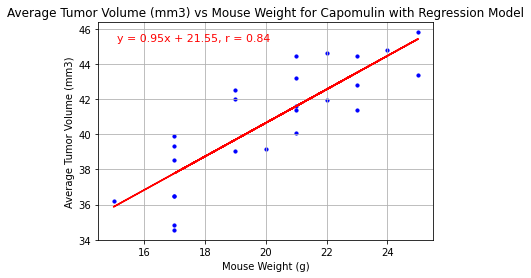

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Mouse_Weight[:],Avg_TVolume[:])
r_correlation = round(correlation[0],4)
print(f"The correlation between Mouse Weight and Avg Tumor Volume is {r_correlation} for mice on {Drug_Regimen}")

#perform linear regression on data of mouse weight (x) and average tumor volume for mouse (y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Mouse_Weight[:],Avg_TVolume[:])
#create list of values calculated from linear regression using mouse weight
regress_values = Mouse_Weight[:] * slope + intercept
#string of linear regression model to add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))+", r = " +str(round(rvalue,2))
#line_eq = line_eq + ", p="+str(round(pvalue,3))
maximum_y = Avg_TVolume.max()
minimum_x = Mouse_Weight.min()
#create scatter plot and add fit line and equation
plt.scatter(Mouse_Weight[:],Avg_TVolume[:],color="blue", s = 10)
plt.plot(Mouse_Weight[:],regress_values,"r-")
plt.annotate(line_eq,(minimum_x+0.1,maximum_y-0.5),fontsize=11,color="red") #writes to coordinates on graph
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f"Average Tumor Volume (mm3) vs Mouse Weight for {Drug_Regimen} with Regression Model")
plt.grid()
plt.show()

## Additional Section - Mouse weight for different treatments
The purpose of this section is to look at the average mouse weight for different treatments.  This is a an additional activity not requested in the assignment.

Why look at this? Since mouse weight correlates to average tumor volume, having different weights of mice may skey the results.

In [51]:

Mouse_ID_group = combined_study.groupby("Mouse ID")
Mouse_Weight_df = pd.DataFrame()
weight = Mouse_ID_group["Weight (g)"].mean()
treatment = Mouse_ID_group["Drug Regimen"].unique()
Mouse_Weight_df["Drug Regimen"] = treatment
Mouse_Weight_df["Weight (g)"] = weight
Avg_Mouse_Weight_df = pd.DataFrame()

Mouse_Weight_df
for x in (regimen_list):
    average_weight = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==x]["Weight (g)"].mean()
    new_row = pd.Series(data={'Treatment':x, 'Avg Weight':average_weight})
    Avg_Mouse_Weight_df = Avg_Mouse_Weight_df.append(new_row, ignore_index = True)

Avg_Mouse_Weight_df

,Avg Weight,Treatment
0,27.320000,Infubinol
1,28.040000,Placebo
2,27.400000,Ceftamin
3,27.875000,Stelasyn
4,27.920000,Zoniferol
5,20.000000,Ramicane
6,28.080000,Ketapril
7,27.291667,Propriva
8,27.240000,Naftisol
9,20.120000,Capomulin


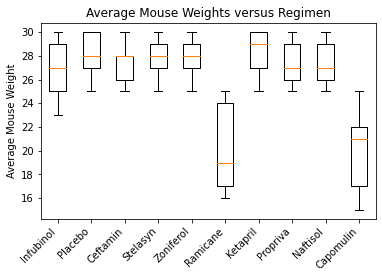

In [52]:
Weight_Treatment0 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[0]]["Weight (g)"]
Weight_Treatment1 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[1]]["Weight (g)"]
Weight_Treatment2 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[2]]["Weight (g)"]
Weight_Treatment3 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[3]]["Weight (g)"]
Weight_Treatment4 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[4]]["Weight (g)"]
Weight_Treatment5 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[5]]["Weight (g)"]
Weight_Treatment6 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[6]]["Weight (g)"]
Weight_Treatment7 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[7]]["Weight (g)"]
Weight_Treatment8 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[8]]["Weight (g)"]
Weight_Treatment9 = Mouse_Weight_df[Mouse_Weight_df["Drug Regimen"]==regimen_list[9]]["Weight (g)"]

red_diamond = dict(markerfacecolor='r', marker='D')
#ax3.boxplot(data, flierprops=green_diamond)

labels = regimen_list
fig1, ax1 = plt.subplots()
ax1.set_title('Average Mouse Weights versus Regimen')
ax1.set_ylabel('Average Mouse Weight')
ax1.boxplot([Weight_Treatment0, Weight_Treatment1, Weight_Treatment2, Weight_Treatment3,Weight_Treatment4,Weight_Treatment5,
            Weight_Treatment6,Weight_Treatment7,Weight_Treatment8,Weight_Treatment9], showfliers = True,
           flierprops = red_diamond, labels=labels)
fig1.autofmt_xdate(rotation=45)
plt.show()
